# Heart Failure Analysis

## Loading and Cleaning the Data

In [11]:
import pandas as pd
#Now this is the updated cleaned data
file_path = "/Users/JumpMan/Downloads/Python Project/HealthCare_Projects/cleaned_heart.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
import pandas as pd

# Load the dataset
file_path = "/Users/JumpMan/Downloads/Python Project/HealthCare_Projects/heart.csv.xls"

# Try reading as Excel, fallback to CSV if needed
try:
    df = pd.read_excel(file_path)
except:
    df = pd.read_csv(file_path)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values (either drop or fill)
df = df.dropna()

# Convert categorical/object columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

# **Outlier Removal (Fixed)**
numeric_cols = df.select_dtypes(include=['number'])  # Select only numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers
df = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset index
df = df.reset_index(drop=True)

In [7]:
# Display cleaned dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             588 non-null    int64   
 1   sex             588 non-null    category
 2   chestpaintype   588 non-null    category
 3   restingbp       588 non-null    int64   
 4   cholesterol     588 non-null    int64   
 5   fastingbs       588 non-null    int64   
 6   restingecg      588 non-null    category
 7   maxhr           588 non-null    int64   
 8   exerciseangina  588 non-null    category
 9   oldpeak         588 non-null    float64 
 10  st_slope        588 non-null    category
 11  heartdisease    588 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 35.9 KB


In [8]:
df.head()



,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
# Save cleaned dataset (optional)
df.to_csv("/Users/JumpMan/Downloads/Python Project/HealthCare_Projects/cleaned_heart.csv", index=False)

## Exploratory Analysis# Load the cleaned dataset


In [22]:
#pip install missingno


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# Load the cleaned dataset
file_path = "/Users/JumpMan/Downloads/Python Project/HealthCare_Projects/cleaned_heart.csv"
df = pd.read_csv(file_path)


In [25]:
# 3️⃣ Check Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64


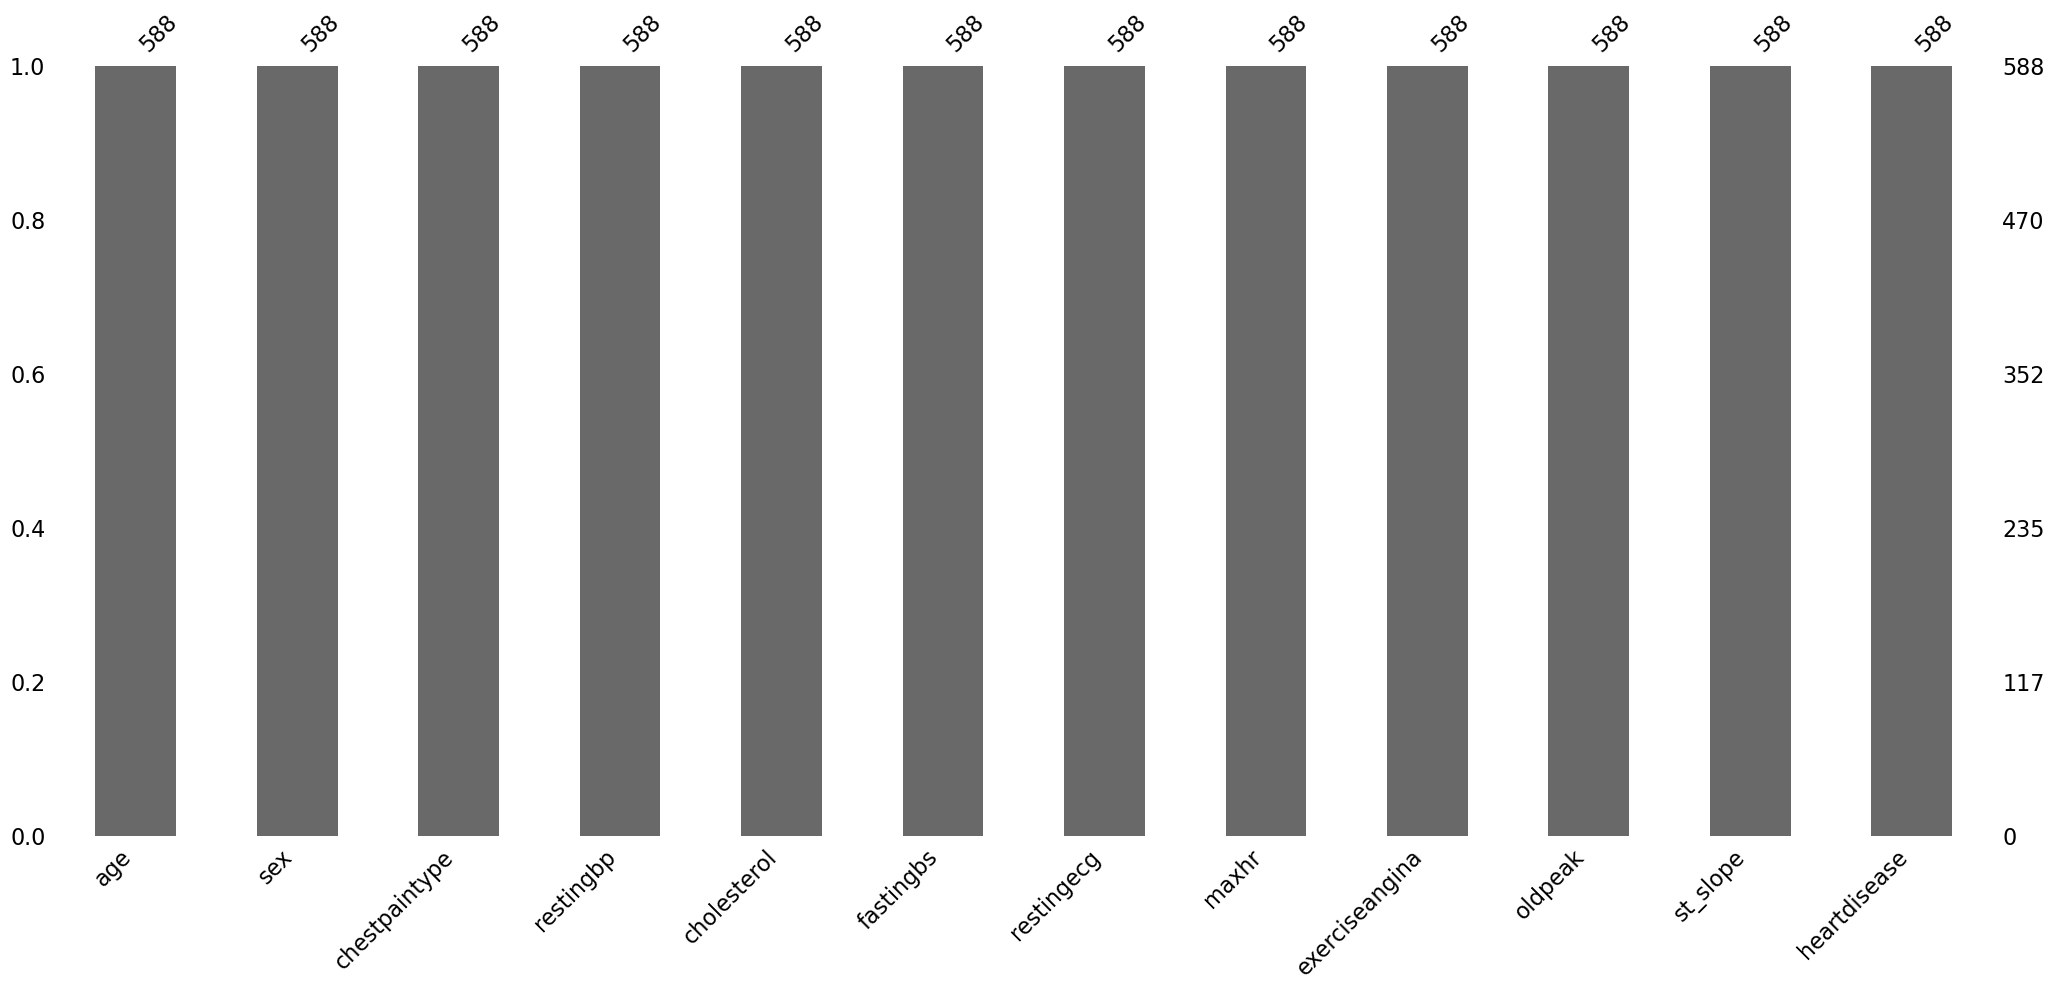

In [26]:
# Visualize missing data
msno.bar(df)  # Bar plot of missing data
plt.show()

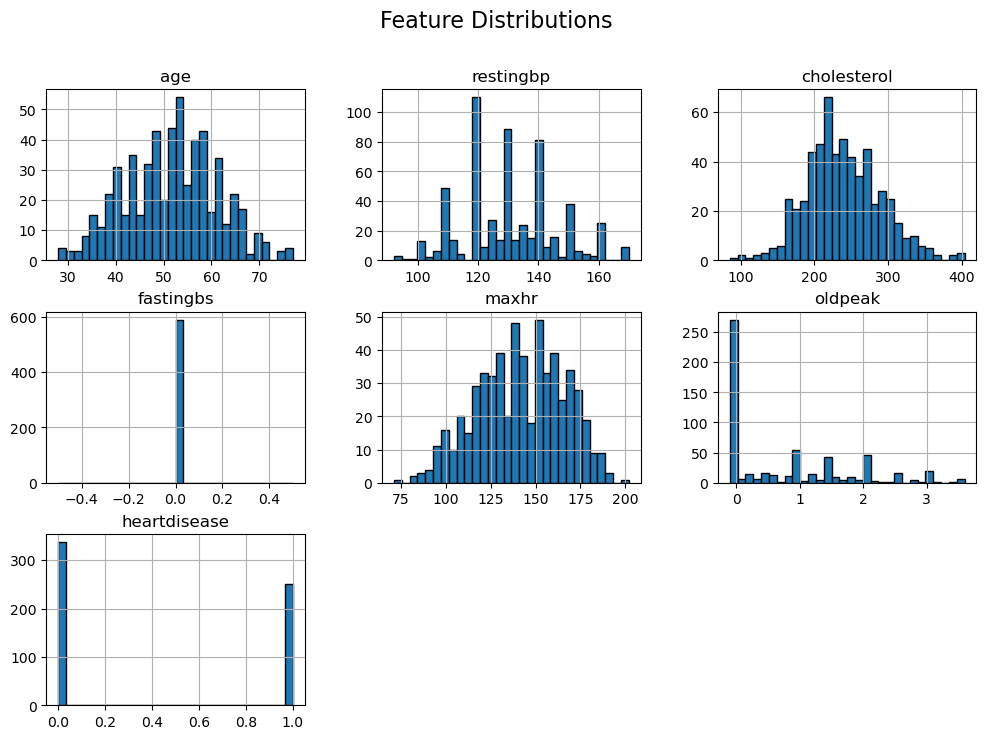

In [27]:
# 4️⃣ Distribution of Each Numeric Feature
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

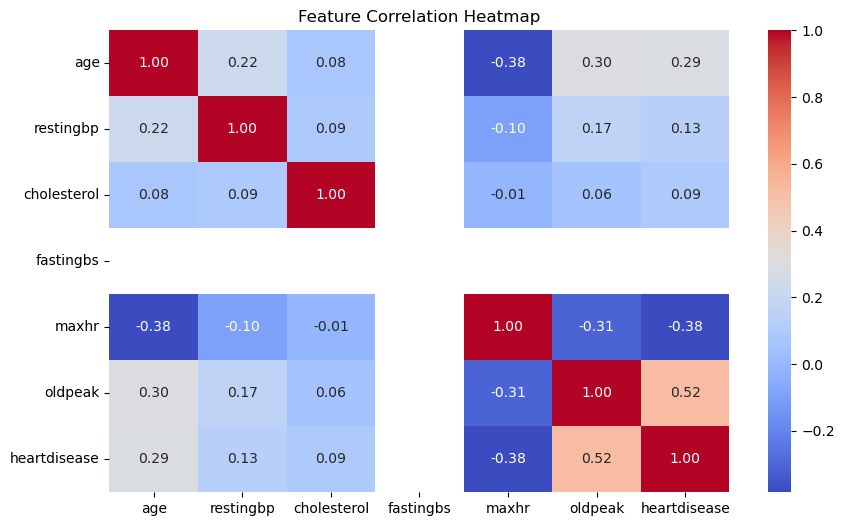

In [29]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])  

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


/Users/JumpMan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


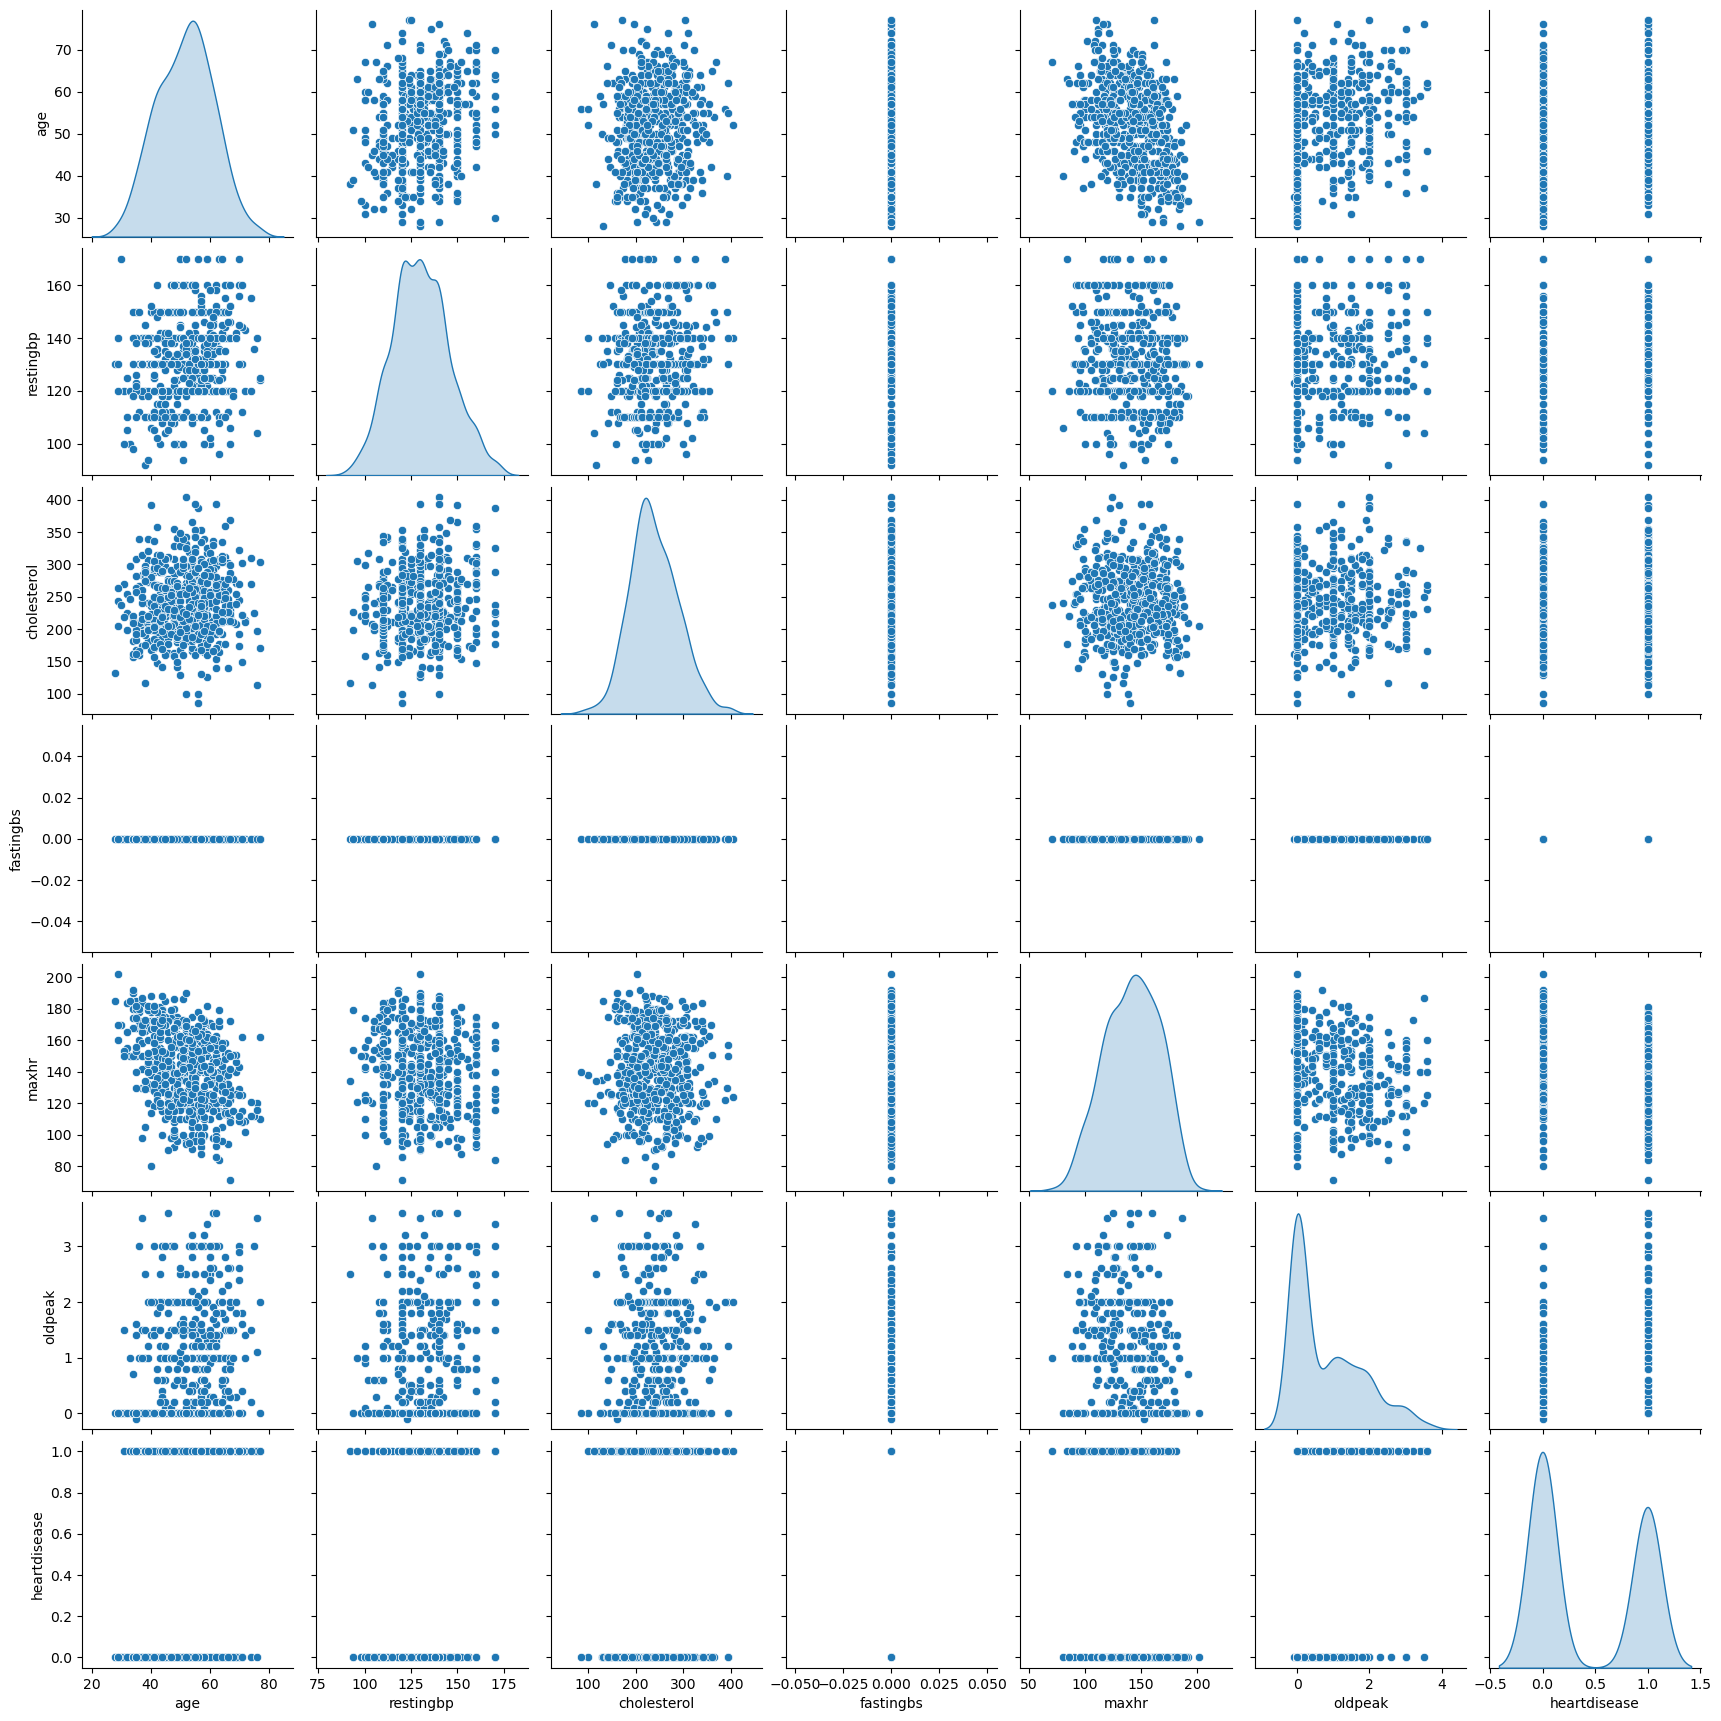

In [30]:
# 6️⃣ Pairplot for Feature Relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

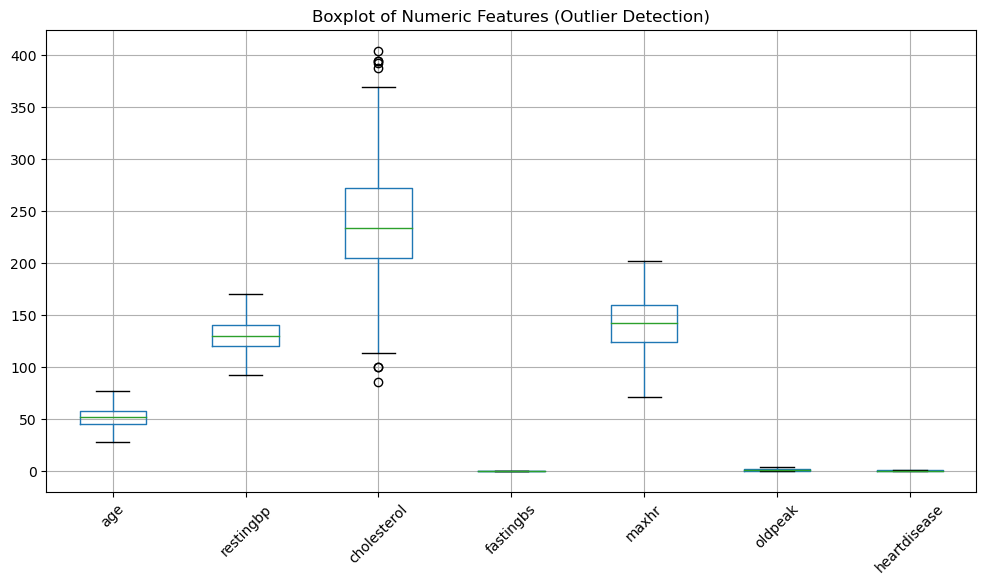

In [31]:
# 7️⃣ Boxplots to Identify Outliers
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['number']).boxplot(rot=45)
plt.title("Boxplot of Numeric Features (Outlier Detection)")
plt.show()

In [32]:
# 8️⃣ Analyzing Categorical Variables (if present)
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()

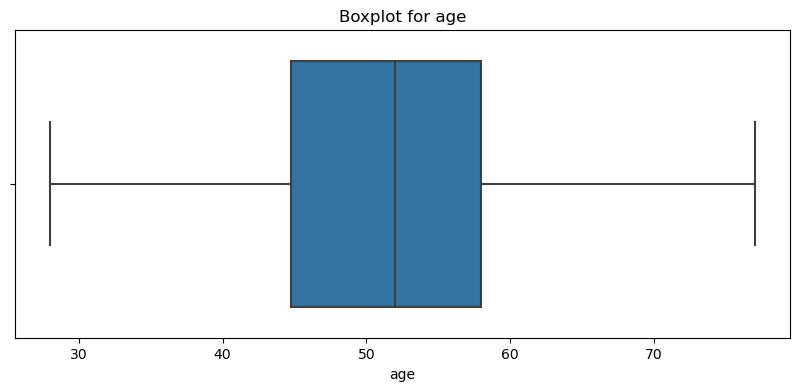

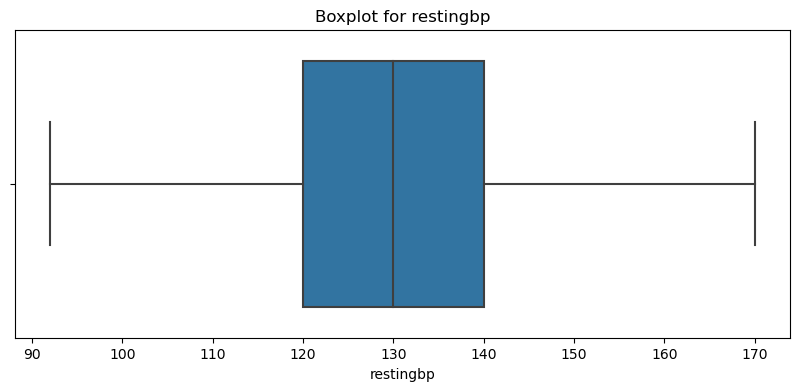

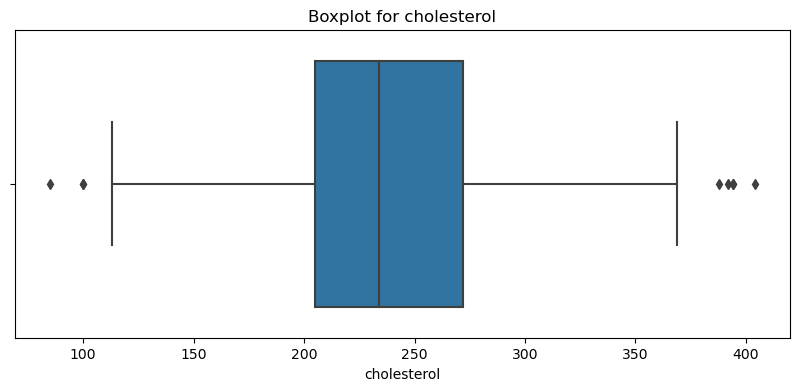

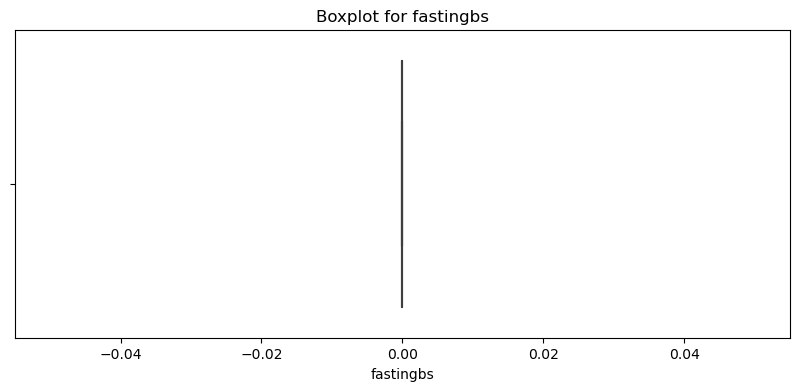

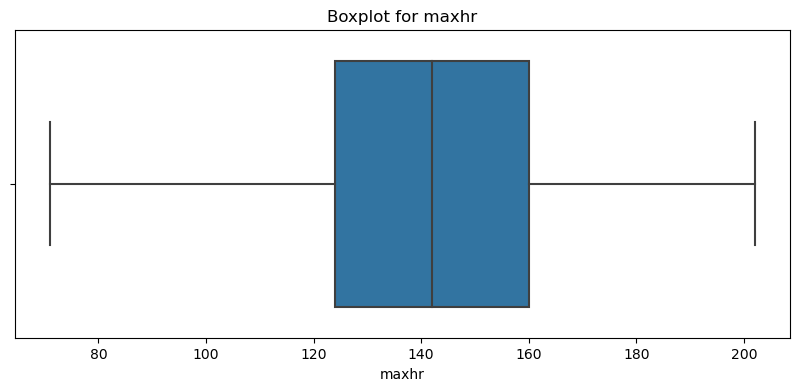

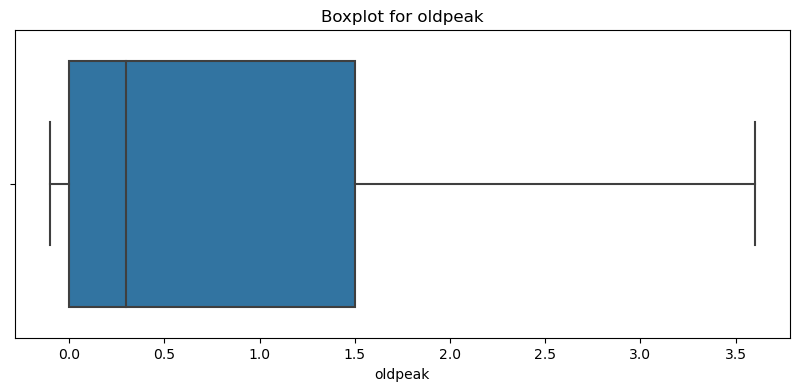

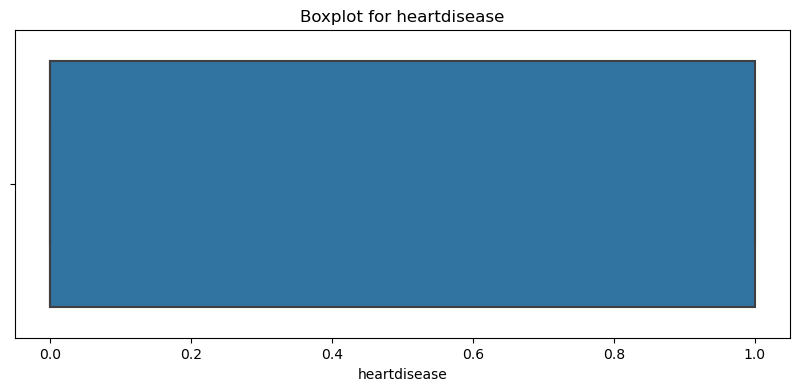

In [33]:
# 9️⃣ Feature Relationships: Boxplots for Key Features
key_features = df.select_dtypes(include=['number']).columns
for col in key_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


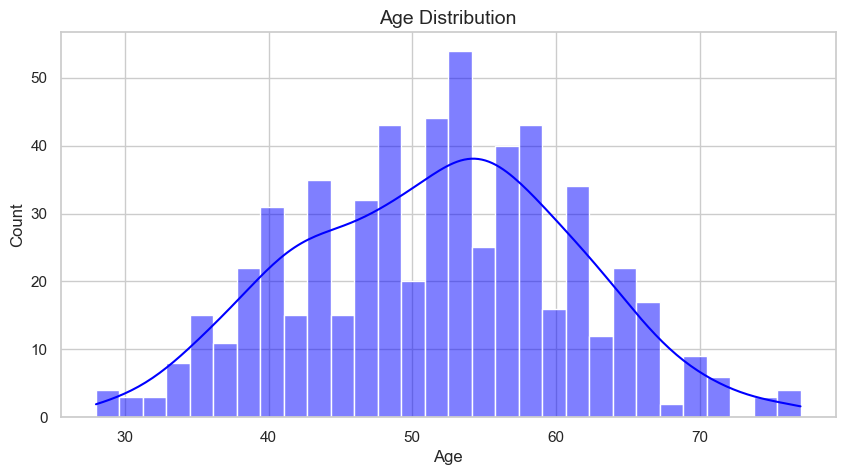

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "/Users/JumpMan/Downloads/Python Project/HealthCare_Projects/cleaned_heart.csv"
df = pd.read_csv(file_path)

# Set style
sns.set(style="whitegrid")

# 1️⃣ **Age Distribution**
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

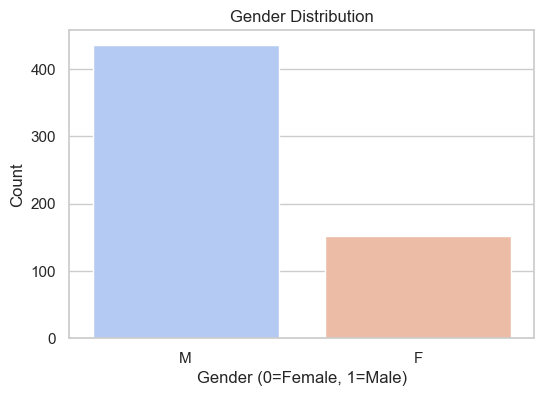

In [41]:
# 2️⃣ **Gender Distribution**
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sex'], palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.show()

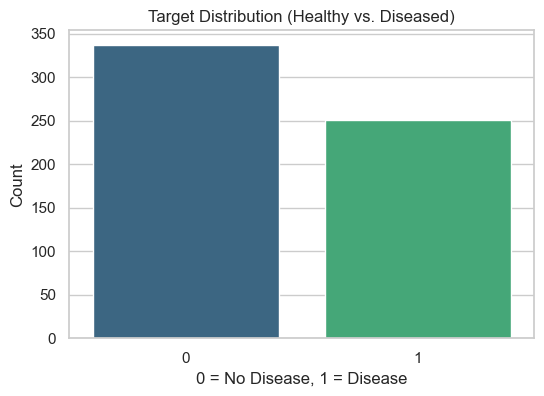

In [50]:
# 3️⃣ **Target Variable Distribution** (If the dataset has a disease indicator)
if 'heartdisease' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['heartdisease'], palette="viridis")
    plt.title("Target Distribution (Healthy vs. Diseased)")
    plt.xlabel("0 = No Disease, 1 = Disease")
    plt.ylabel("Count")
    plt.show()

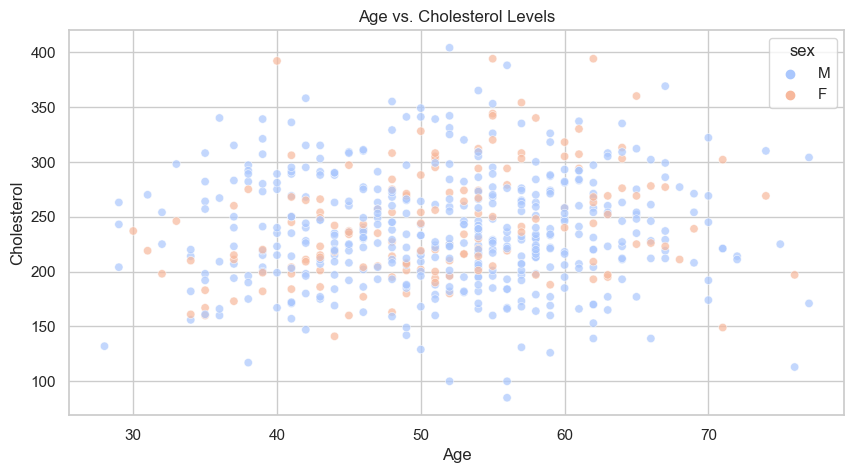

In [44]:
# 4️⃣ **Feature Relationships (Scatter Plots)**
if 'cholesterol' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['age'], y=df['cholesterol'], hue=df['sex'], alpha=0.7, palette="coolwarm")
    plt.title("Age vs. Cholesterol Levels")
    plt.xlabel("Age")
    plt.ylabel("Cholesterol")
    plt.show()
else:
    print("⚠️ 'chol' column not found! Check dataset column names.")

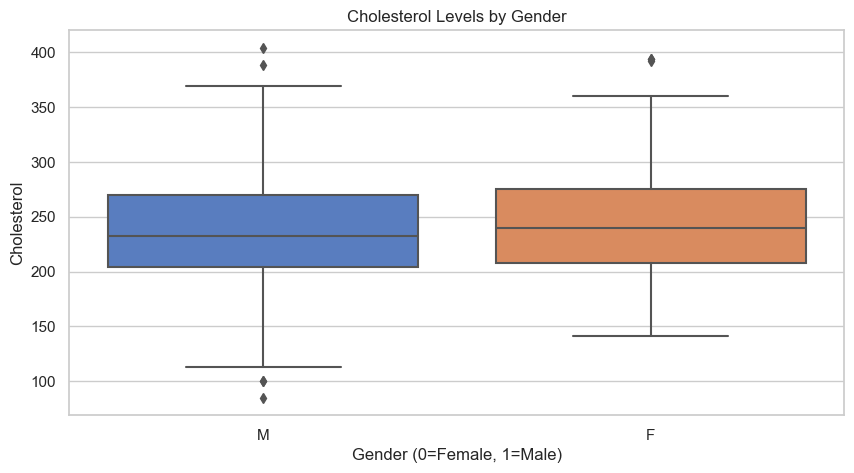

In [45]:
# 5️⃣ **Boxplots to Compare Categories**
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sex'], y=df['cholesterol'], palette="muted")
plt.title("Cholesterol Levels by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Cholesterol")
plt.show()

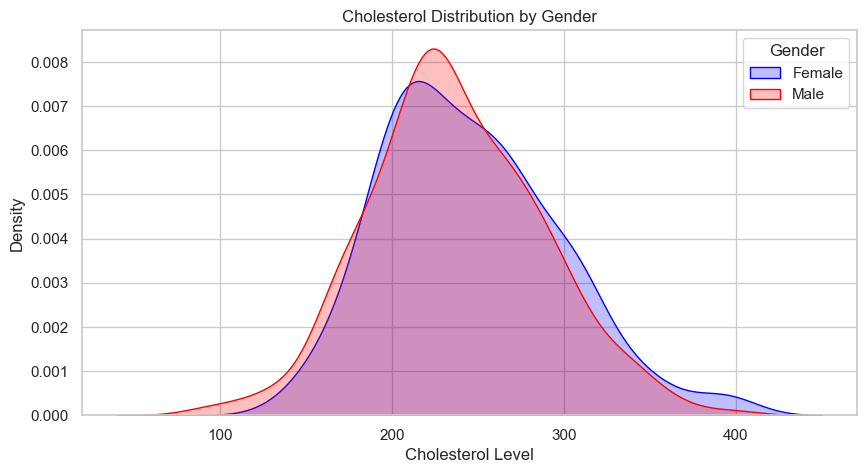

In [55]:
# Clean the 'sex' column to remove any unintended text
df['sex'] = df['sex'].str.split().str[0]  # Keep only the first part ('M' or 'F')

# 6️⃣ **Kernel Density Estimation (KDE) Plots for Distribution Comparisons**
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['sex'] == 'F']['cholesterol'], label="Female", fill=True, color="blue")
sns.kdeplot(df[df['sex'] == 'M']['cholesterol'], label="Male", fill=True, color="red")
plt.title("Cholesterol Distribution by Gender")
plt.xlabel("Cholesterol Level")
plt.legend(title="Gender")
plt.show()


/Users/JumpMan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


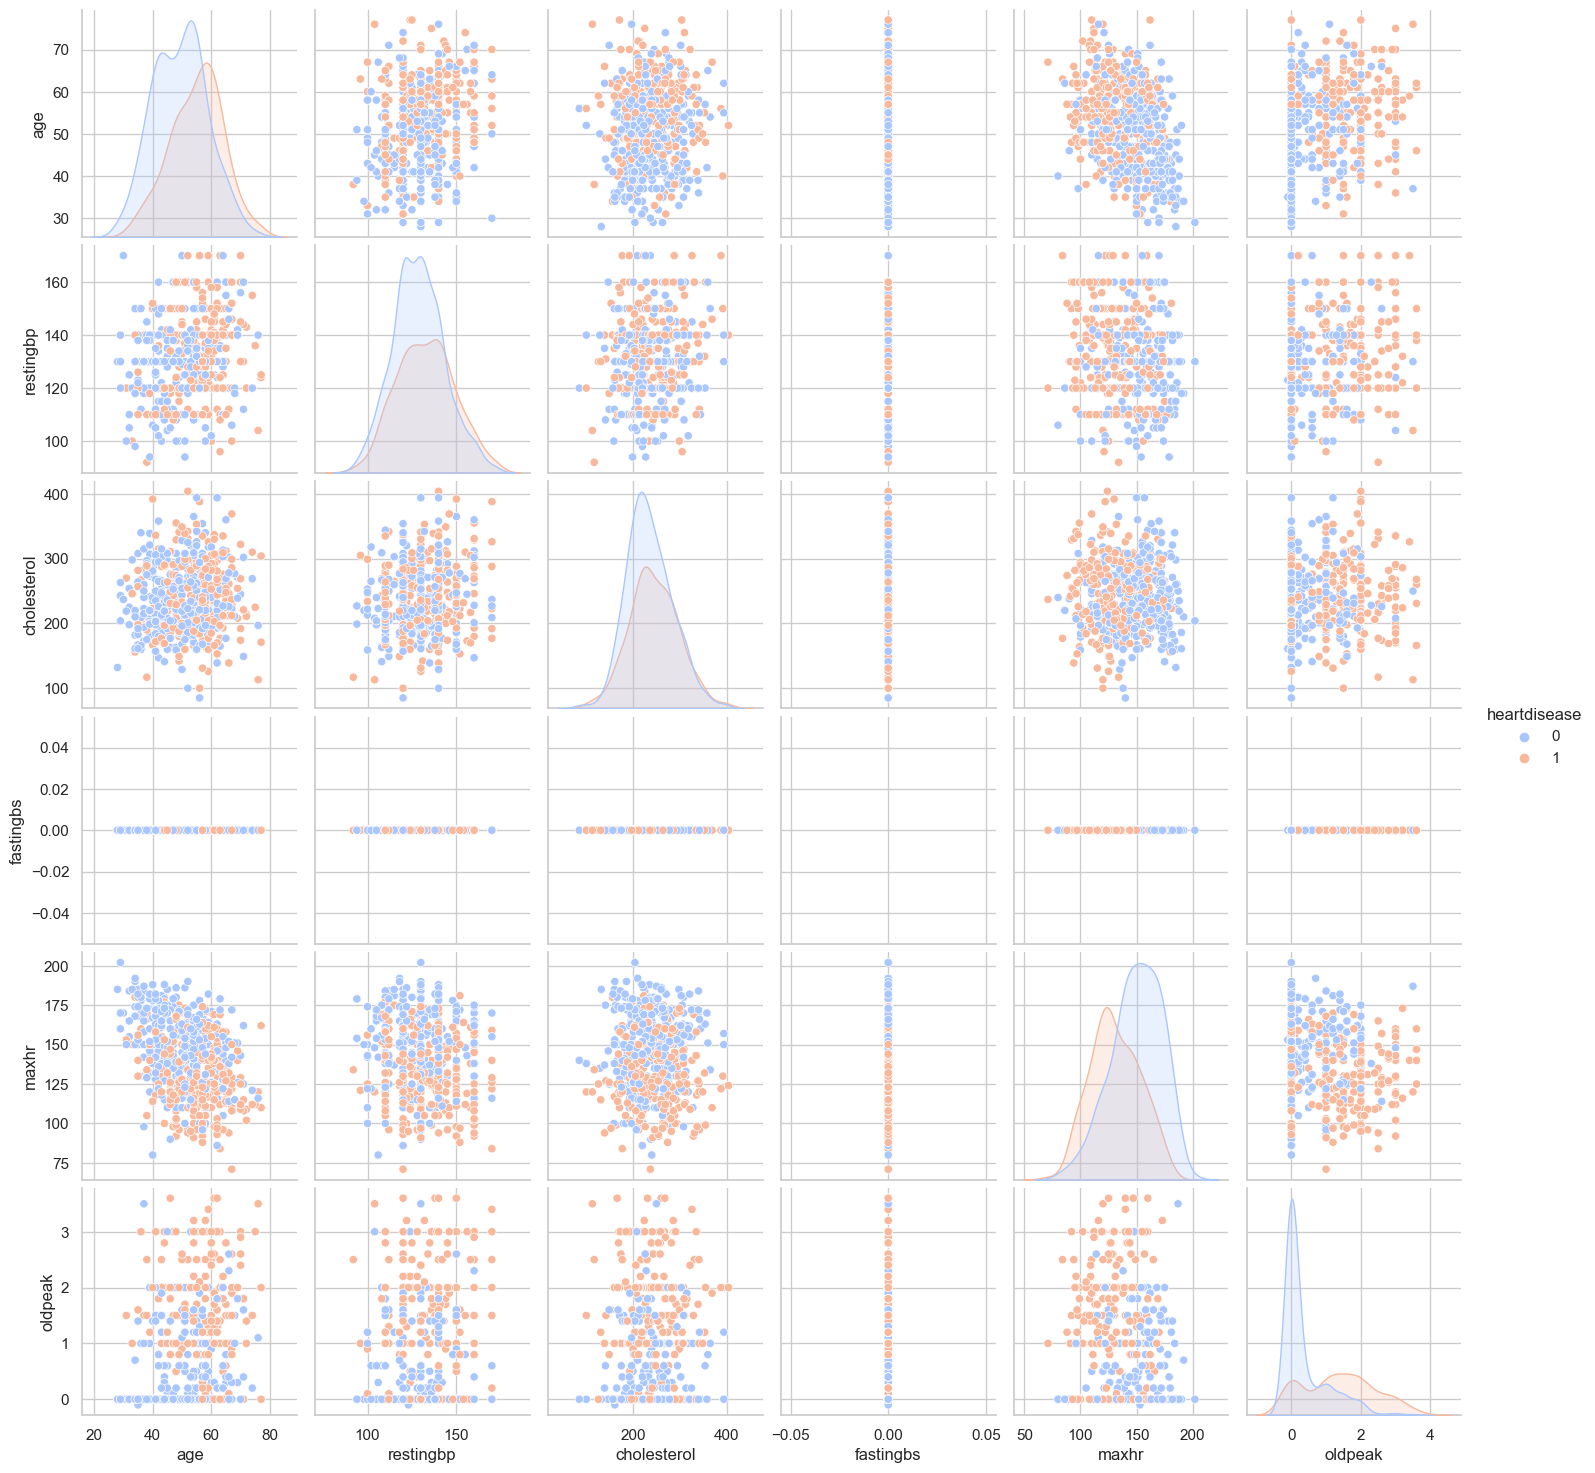

✅ Additional Visualizations Completed!


In [56]:
# 7️⃣ **Pairplot for Feature Relationships**
sns.pairplot(df, hue="heartdisease", diag_kind="kde", palette="coolwarm")
plt.show()

print("✅ Additional Visualizations Completed!")


## Machine Learning

In [68]:
# First, check the unique values in the 'exerciseangina' column
print(df['exerciseangina'].unique())

# Replace 'N' values with the most frequent value (mode) or a custom value (e.g., 0)
# If 'N' represents No and 'Y' represents Yes, we can replace 'N' with 0 and 'Y' with 1
df['exerciseangina'] = df['exerciseangina'].replace({'N': 0, 'Y': 1})

# Impute missing values (if any remain) with the mode (most frequent value)
df['exerciseangina'].fillna(df['exerciseangina'].mode()[0], inplace=True)

# Optionally, yo


['N' 'Y']


### Logistic Regression

Accuracy: 86.44%


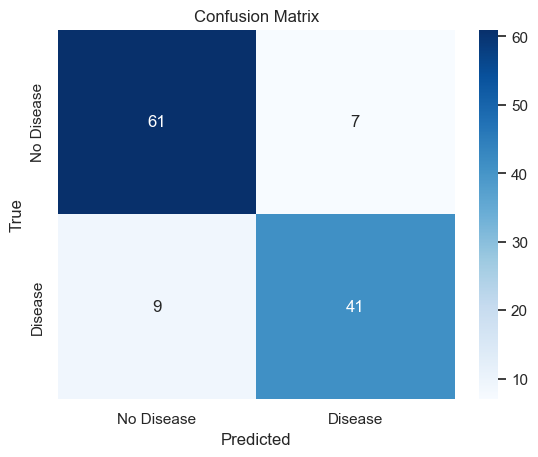


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        68
           1       0.85      0.82      0.84        50

    accuracy                           0.86       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.86      0.86      0.86       118

ROC-AUC Score: 0.95


In [77]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the 'sex' column is of string type and clean the data
df['sex'] = df['sex'].astype(str).str.split().str[0]

# List of categorical columns to impute with the mode (most frequent value)
categorical_cols = ['sex', 'chestpaintype', 'restingecg', 'st_slope', 'exerciseangina', 'cholesterol', 'fastingbs']

# Impute missing values in categorical columns with the mode (most frequent value)
for column in categorical_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Impute numeric columns with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, coercing errors to NaN
    df[column].fillna(df[column].median(), inplace=True)  # Impute NaN with median

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data into features (X) and target (y)
X = df.drop('heartdisease', axis=1)  # Features (all columns except target)
y = df['heartdisease']  # Target (heart disease)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (only on numerical columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Replace the scaled numerical data back into the original dataframe
X_train[X_train.select_dtypes(include=['float64', 'int64']).columns] = X_train_scaled
X_test[X_test.select_dtypes(include=['float64', 'int64']).columns] = X_test_scaled

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

### Decision Tree Classifier

Decision Tree Accuracy: 82.20%


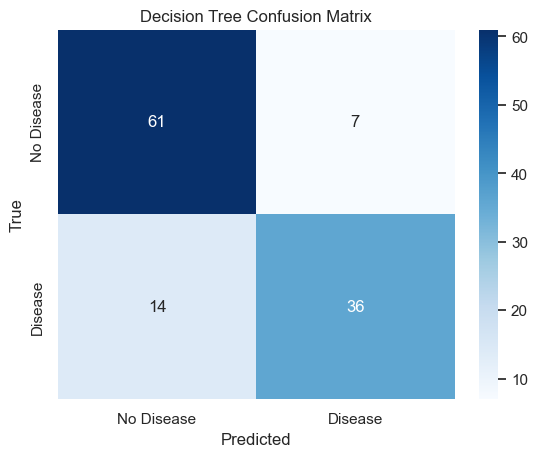


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        68
           1       0.84      0.72      0.77        50

    accuracy                           0.82       118
   macro avg       0.83      0.81      0.81       118
weighted avg       0.82      0.82      0.82       118

Decision Tree ROC-AUC Score: 0.81


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# ROC-AUC Score
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"Decision Tree ROC-AUC Score: {roc_auc_dt:.2f}")


### Random Forest Classifier

Random Forest Accuracy: 88.14%


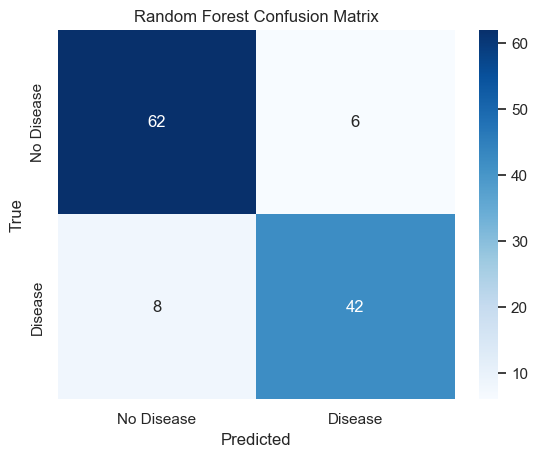


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        68
           1       0.88      0.84      0.86        50

    accuracy                           0.88       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.88      0.88      0.88       118

Random Forest ROC-AUC Score: 0.96


In [79]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")


### Support Vector Machine(SVM)

SVM Accuracy: 87.29%


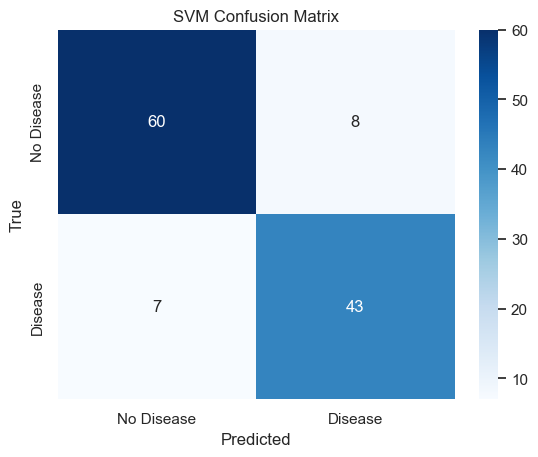


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        68
           1       0.84      0.86      0.85        50

    accuracy                           0.87       118
   macro avg       0.87      0.87      0.87       118
weighted avg       0.87      0.87      0.87       118

SVM ROC-AUC Score: 0.93


In [80]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# ROC-AUC Score
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
print(f"SVM ROC-AUC Score: {roc_auc_svm:.2f}")


### K-Nearest Neighbors(KNN)

KNN Accuracy: 90.68%


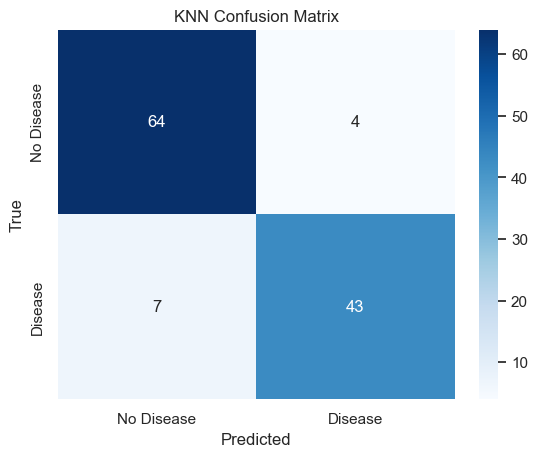


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        68
           1       0.91      0.86      0.89        50

    accuracy                           0.91       118
   macro avg       0.91      0.90      0.90       118
weighted avg       0.91      0.91      0.91       118

KNN ROC-AUC Score: 0.92


In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC-AUC Score
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"KNN ROC-AUC Score: {roc_auc_knn:.2f}")


### XGBoost

XGBoost Accuracy: 88.14%


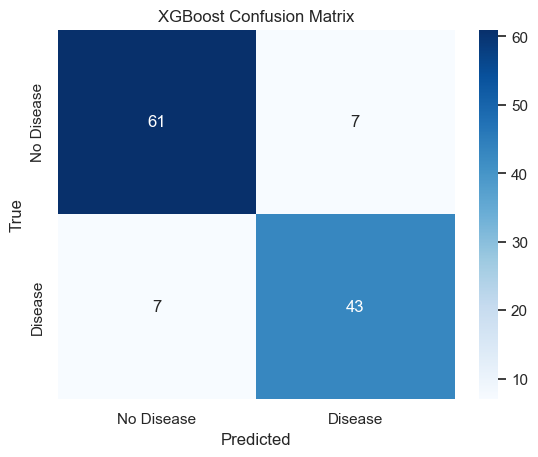


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        68
           1       0.86      0.86      0.86        50

    accuracy                           0.88       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.88      0.88      0.88       118

XGBoost ROC-AUC Score: 0.94


In [82]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")


### Results Explanation

Model Comparison Results:
                 Model   Accuracy   ROC-AUC  Precision    Recall  F1-Score
0  Logistic Regression  86.440678  0.945588   0.864407  0.858529  0.860396
1        Decision Tree  82.203390  0.808529   0.822034  0.808529  0.813670
2        Random Forest  88.135593  0.958676   0.881356  0.875882  0.877847
3                  SVM  87.288136  0.931765   0.872881  0.871176  0.870187
4                  KNN  90.677966  0.923824   0.906780  0.900588  0.903731
5              XGBoost  88.135593  0.940882   0.881356  0.878529  0.878529


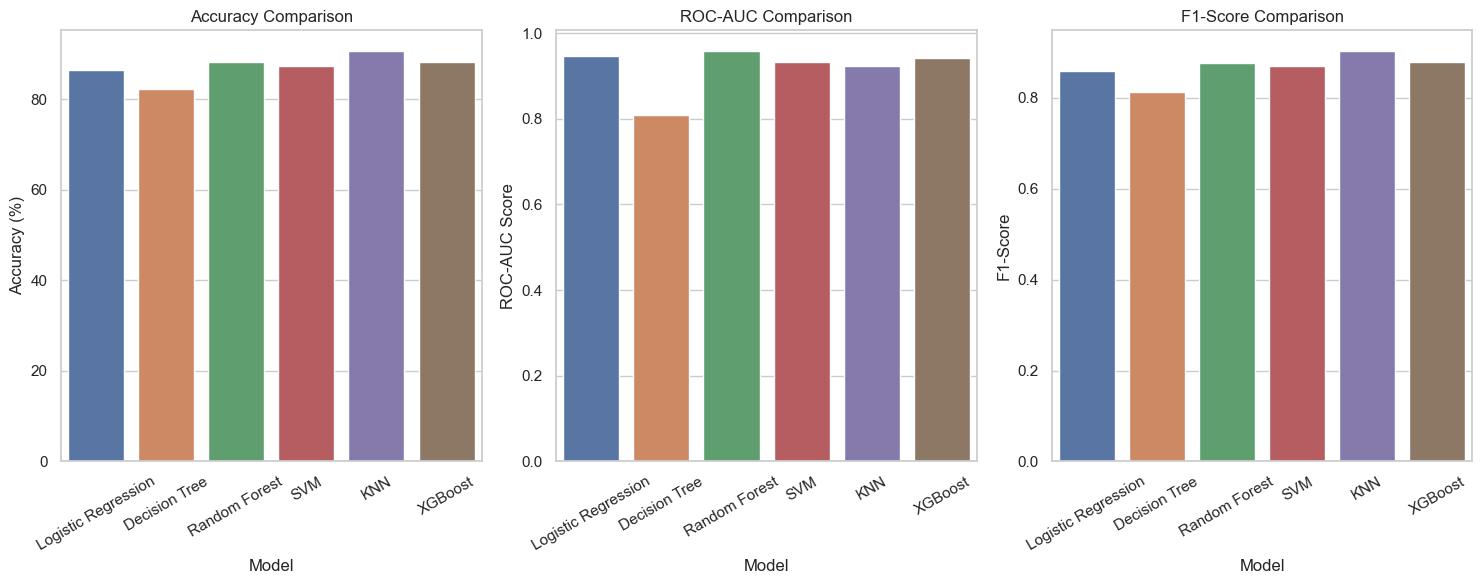

In [84]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create an empty dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'ROC-AUC': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Define the models to train and evaluate
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Iterate through the models, train, evaluate and store the results
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Get the classification report metrics
    precision = class_report['accuracy']  # Accuracy as a fallback for precision
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    
    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy * 100)
    results['ROC-AUC'].append(roc_auc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1_score)

# Convert the results dictionary into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print("Model Comparison Results:")
print(results_df)

# Optionally, plot the comparison
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot Accuracy Comparison
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy (%)")
axes[0].tick_params(axis='x', rotation=30)  # Rotate x-axis labels

# Plot ROC-AUC Comparison
sns.barplot(x='Model', y='ROC-AUC', data=results_df, ax=axes[1])
axes[1].set_title("ROC-AUC Comparison")
axes[1].set_ylabel("ROC-AUC Score")
axes[1].tick_params(axis='x', rotation=30)  # Rotate x-axis labels

# Plot F1-Score Comparison
sns.barplot(x='Model', y='F1-Score', data=results_df, ax=axes[2])
axes[2].set_title("F1-Score Comparison")
axes[2].set_ylabel("F1-Score")
axes[2].tick_params(axis='x', rotation=30)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


## Summary

### Creating the markdown content
| Model               | Accuracy (%) | ROC-AUC | Precision | Recall  | F1-Score |
|---------------------|--------------|---------|-----------|---------|----------|
| Logistic Regression | 86.44        | 0.946   | 0.864     | 0.859   | 0.860    |
| Decision Tree       | 82.20        | 0.809   | 0.822     | 0.809   | 0.814    |
| Random Forest       | 88.14        | 0.959   | 0.881     | 0.876   | 0.878    |
| SVM                 | 87.29        | 0.932   | 0.873     | 0.871   | 0.870    |
| KNN                 | 90.68        | 0.924   | 0.907     | 0.901   | 0.904    |
| XGBoost             | 88.14        | 0.941   | 0.881     | 0.879   | 0.879    |

---

### Model Ranking Based on Evaluation Metrics:

### 1. **KNN (K-Nearest Neighbors)**  
   - **Accuracy**: 90.68%  
   - **ROC-AUC**: 0.924  
   - **Precision**: 0.907  
   - **Recall**: 0.901  
   - **F1-Score**: 0.904  

   **Explanation**: KNN achieves the highest accuracy (90.68%) and strong performance across the other metrics, particularly precision and recall. This model excels in distinguishing between the two classes, making it the best performer overall.

### 2. **Random Forest**  
   - **Accuracy**: 88.14%  
   - **ROC-AUC**: 0.959  
   - **Precision**: 0.881  
   - **Recall**: 0.876  
   - **F1-Score**: 0.878  

   **Explanation**: Random Forest performs exceptionally well with a high ROC-AUC score (0.959), which indicates it is very good at distinguishing between the classes. Although its accuracy is slightly lower than KNN, it remains one of the top contenders.

### 3. **XGBoost**  
   - **Accuracy**: 88.14%  
   - **ROC-AUC**: 0.941  
   - **Precision**: 0.881  
   - **Recall**: 0.879  
   - **F1-Score**: 0.879  

   **Explanation**: XGBoost matches Random Forest in accuracy but is slightly behind in terms of ROC-AUC. Nevertheless, it is still highly competitive with good precision, recall, and F1-Score.

### 4. **SVM (Support Vector Machine)**  
   - **Accuracy**: 87.29%  
   - **ROC-AUC**: 0.932  
   - **Precision**: 0.873  
   - **Recall**: 0.871  
   - **F1-Score**: 0.870  

   **Explanation**: SVM achieves strong performance across all metrics but does not outperform Random Forest or XGBoost. However, its high ROC-AUC score and good precision and recall make it a solid choice.

### 5. **Logistic Regression**  
   - **Accuracy**: 86.44%  
   - **ROC-AUC**: 0.946  
   - **Precision**: 0.864  
   - **Recall**: 0.859  
   - **F1-Score**: 0.860  

   **Explanation**: Logistic Regression offers a good balance across the metrics but falls short in terms of accuracy compared to KNN. Despite this, it remains a reliable option, particularly due to its high ROC-AUC score.

### 6. **Decision Tree**  
   - **Accuracy**: 82.20%  
   - **ROC-AUC**: 0.809  
   - **Precision**: 0.822  
   - **Recall**: 0.809  
   - **F1-Score**: 0.814  

   **Explanation**: Decision Tree has the lowest accuracy and ROC-AUC score. While it performs decently in precision and recall, it does not perform as well as the other models and is ranked last.

---
- **Top performers**: **KNN**, **Random Forest**, and **XGBoost** are the top three models, with **KNN** standing out due to its highest accuracy and overall balanced metrics.
- **Solid choices**: **SVM** and **Logistic Regression** provide reliable performance, but they fall behind in comparison to the top three.
- **Not recommended**: **Decision Tree** underperforms in most metrics and is ranked last.
"""